**This is the first step of our project ,importing the necessary python libraries for preprocessing and visualization**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the csv file using pandas library


In [2]:
 data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PoductDemand.csv")

In [3]:
print(data.head())

   ID  Store ID  Total Price  Base Price  Units Sold
0   1      8091      99.0375    111.8625          20
1   2      8091      99.0375     99.0375          28
2   3      8091     133.9500    133.9500          19
3   4      8091     133.9500    133.9500          44
4   5      8091     141.0750    141.0750          52


This cell describe the shape of the dataset

In [4]:
print(data.shape)

(150150, 5)


This cell describe the full information of the dataset

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB
None


to calculating the null value

In [6]:
data.isna().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [7]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

fill the null value using ffill method

In [8]:
data["Total Price"].fillna( method ='ffill', inplace = True)


In [9]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [10]:
data.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626984,219.425927,51.674206
std,61386.037861,615.591445,103.308212,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


to show the histogram of the whole datast

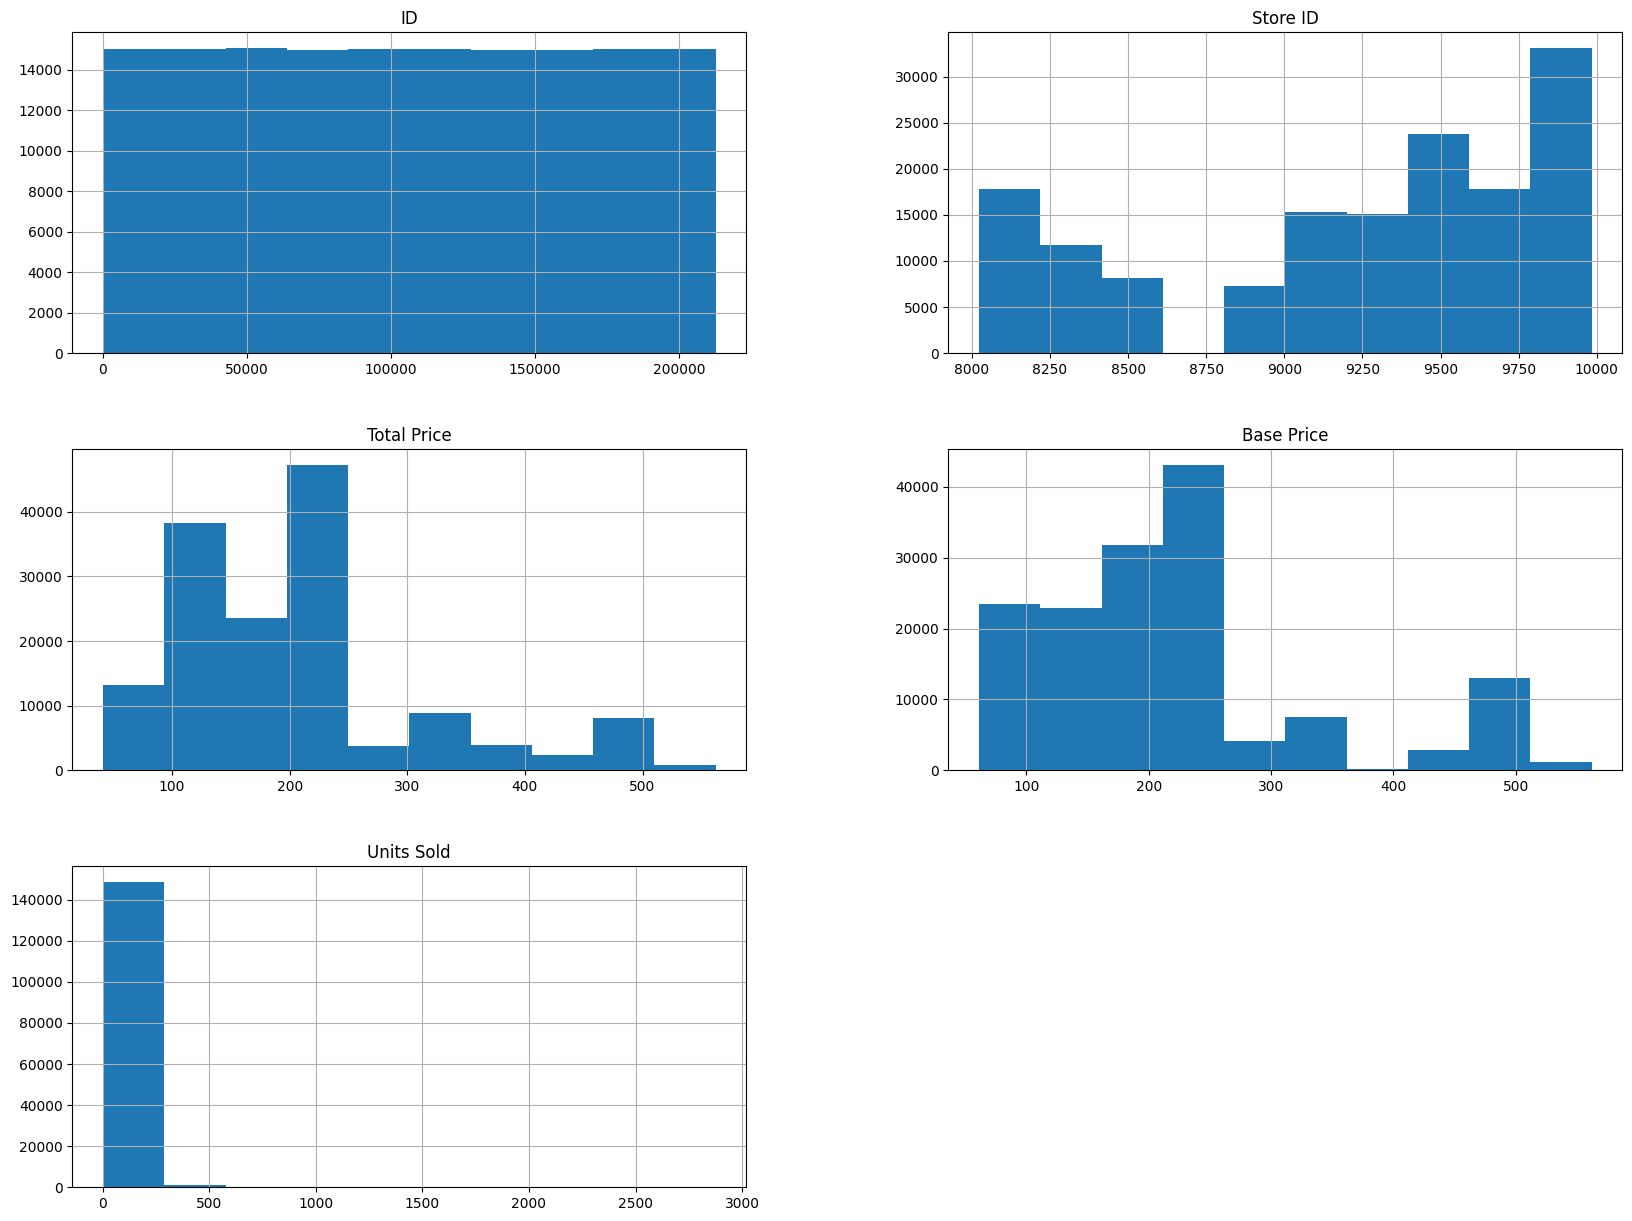

In [11]:
data.hist(figsize=(20,15))
plt.show()

this cell show the correlation of the dataset

In [12]:
data.corr()

,ID,Store ID,Total Price,Base Price,Units Sold
ID,1.000000,0.007464,0.008476,0.018932,-0.010616
Store ID,0.007464,1.000000,-0.038314,-0.038848,-0.004372
Total Price,0.008476,-0.038314,1.000000,0.958873,-0.235626
Base Price,0.018932,-0.038848,0.958873,1.000000,-0.140032
Units Sold,-0.010616,-0.004372,-0.235626,-0.140032,1.000000


**** **VISUALIZATION**

scatter plot for the units sold and total price attributes

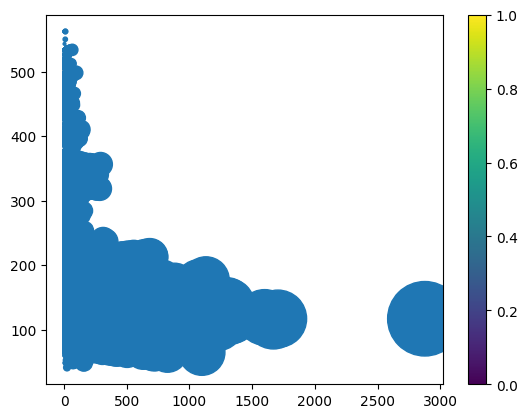

In [13]:
x = data["Units Sold"]
y = data["Total Price"]
sizes = data["Units Sold"]

plt.scatter(x, y,  s=sizes, cmap='viridis')
plt.colorbar()
plt.show()

In [14]:
import plotly.express as px
fig = px.scatter(data, x="Units Sold", y="Total Price",
                 size='Units Sold')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

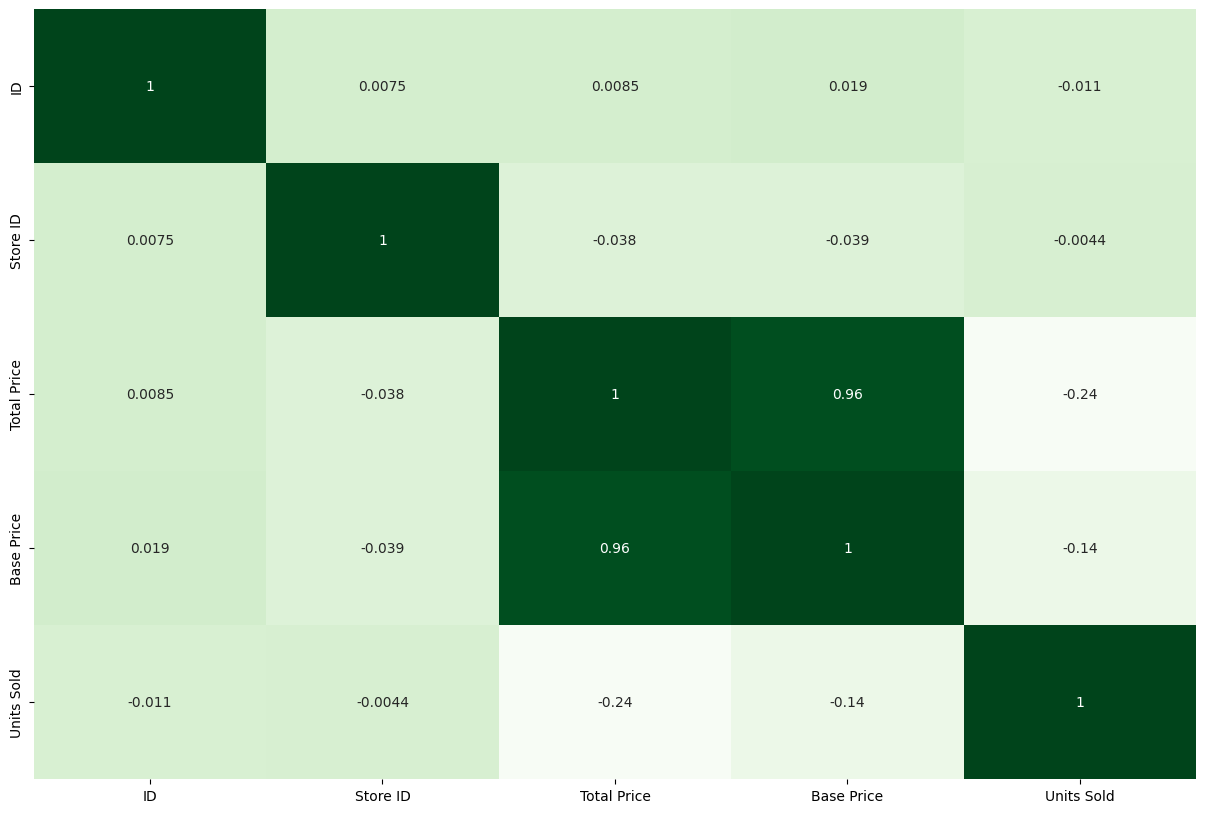

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(),annot= True, cbar = False, cmap = "Greens")
plt.show()

line plot for the store id & base price attributes

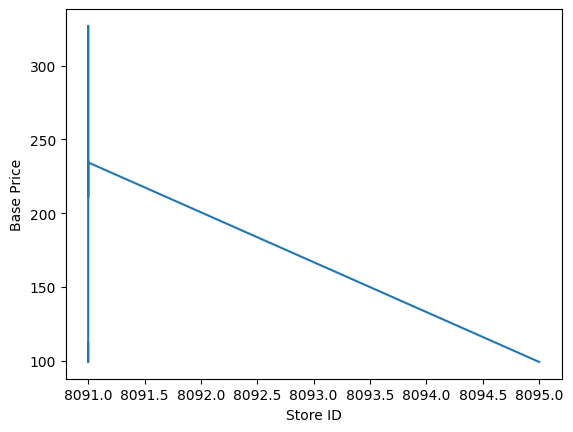

In [16]:
x = data["Store ID"].head(10)
y = data["Base Price"].head(10)

plt.plot(x,y,"-")
plt.xlabel("Store ID")
plt.ylabel("Base Price")
plt.show()

line plot for the units sold and total price attributes

In [17]:
x = data["Units Sold"].head(20)
y = data["Total Price"].head(20)

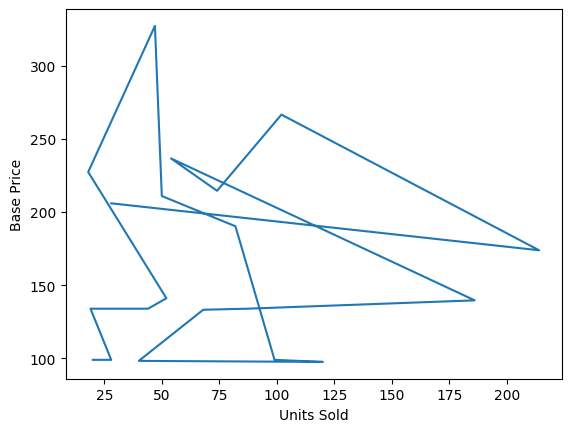

In [18]:
plt.plot(x,y,'-')
plt.xlabel("Units Sold")
plt.ylabel("Base Price")
plt.show()

bar plot for the units sold and total price attributes

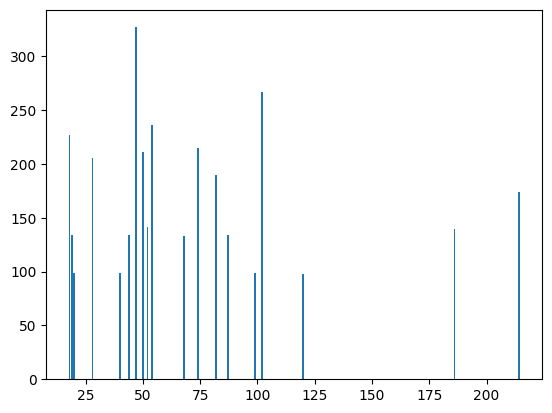

In [19]:
x = data["Units Sold"].head(20)
y = data["Total Price"].head(20)


plt.bar(x,y)

plt.show()


bar plot for the store id & base price attributes

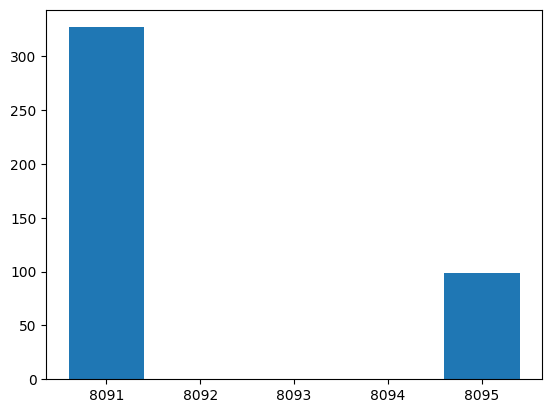

In [20]:
x = data["Store ID"].head(10)
y = data["Base Price"].head(10)
plt.bar(x,y)
plt.show()

stocked plot

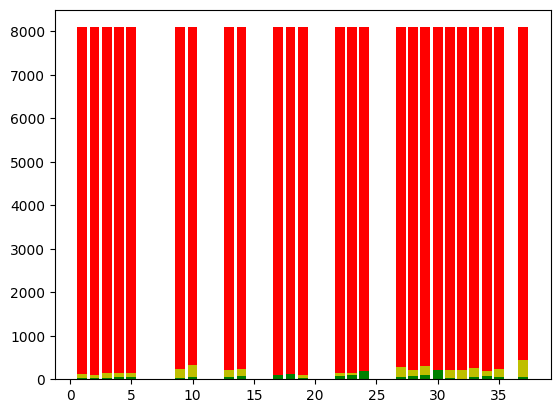

In [21]:
x = data["ID"].head(25)
y1 = data["Store ID"].head(25)
y2 = data["Total Price"].head(25)
y3 = data["Base Price"].head(25)
y4 = data["Units Sold"].head(25)


plt.bar(x, y1, color='r')
plt.bar(x, y2, color='b')
plt.bar(x, y3, color='y')
plt.bar(x, y4, color='g')

plt.show()


<Figure size 500x700 with 0 Axes>

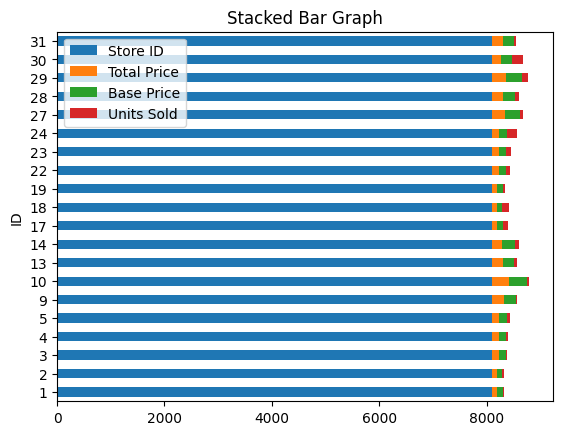

In [22]:
fig = plt.figure(figsize =(5, 7))
x = data.head(20)
x.plot(
    x = "ID",
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)
plt.show()

box plot of three attribute

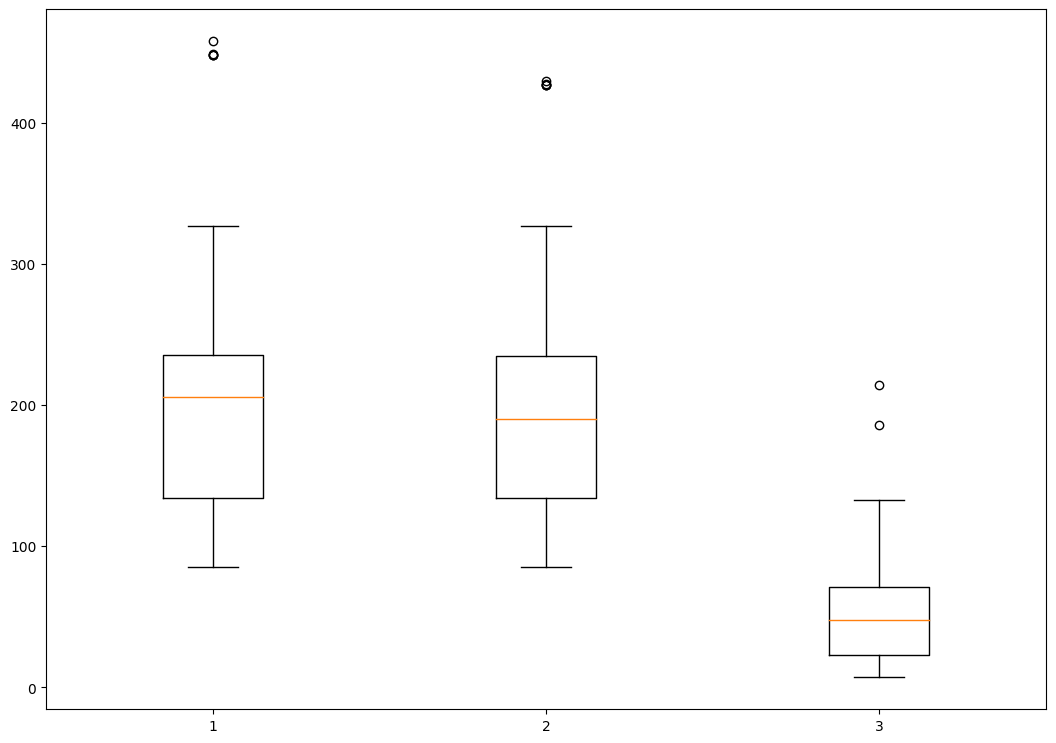

In [23]:
x = data["Base Price"].head(50)
y = data["Total Price"].head(50)
z = data["Units Sold"].head(50)
data = [x, y, z]

fig = plt.figure(figsize =(10, 7))


ax = fig.add_axes([0, 0, 1, 1])


bp = ax.boxplot(data)

plt.show()


violinplot

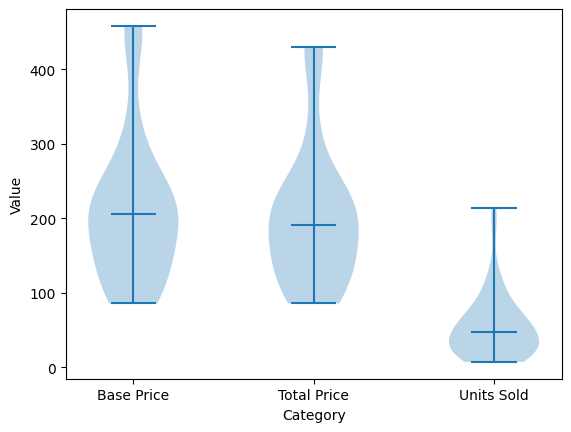

In [24]:
categories = ['Base Price', 'Total Price', 'Units Sold']
data = [x, y, z]

plt.figure()
plt.violinplot(data, showmedians=True)

plt.xlabel('Category')
plt.ylabel('Value')

plt.xticks(np.arange(1, len(categories) + 1), categories)


plt.show()


In [25]:
z = data["Units Sold"].head(1000)
z.value_counts()

TypeError: ignored

In [ ]:
data["Store ID"].head(5).value_counts()

In [27]:
data["Store ID"].value_counts()


TypeError: ignored